In [1]:
!pip install prince
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import prince
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Housing Dreams' 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
/content/drive/My Drive/Housing Dreams


# Análisis preliminar


In [2]:
# Se importa Dataset
housing = pd.read_csv('house_train_raw.csv')
housing.set_index('Id',inplace=True)


# Se reemplazan valores nulos por su definición en el diccionario
housing.Alley.fillna('No alley access',inplace=True)
housing.FireplaceQu.fillna('No Fireplace',inplace=True)
housing.PoolQC.fillna('No pool',inplace=True)
housing.Fence.fillna('No fence',inplace=True)
housing.BsmtQual.fillna('No Basement',inplace=True)
housing.BsmtCond.fillna('No Basement',inplace=True)
housing.BsmtFinType1.fillna('No Basement',inplace=True)
housing.BsmtFinType2.fillna('No Basement',inplace=True)
housing.GarageType.fillna('No Garage',inplace=True)
housing.GarageFinish.fillna('No Garage',inplace=True)
housing.GarageQual.fillna('No Garage',inplace=True)
housing.GarageCond .fillna('No Garage',inplace=True)
housing.MiscFeature .fillna('None',inplace=True)

# Se separan variables categóricas y numéricas
housing.loc[:,['OverallQual','OverallCond','MSSubClass']]=housing.loc[:,['OverallQual','OverallCond','MSSubClass']].astype('object')
housing_categoricas = housing.select_dtypes(include=['object','category'])
housing_numericas = housing.select_dtypes(include='number')
housing.loc[:,housing_categoricas.columns.values] = housing.loc[:,housing_categoricas.columns.values].astype('object')


In [ ]:
# Descripción de variables numéricas
housing_numericas.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


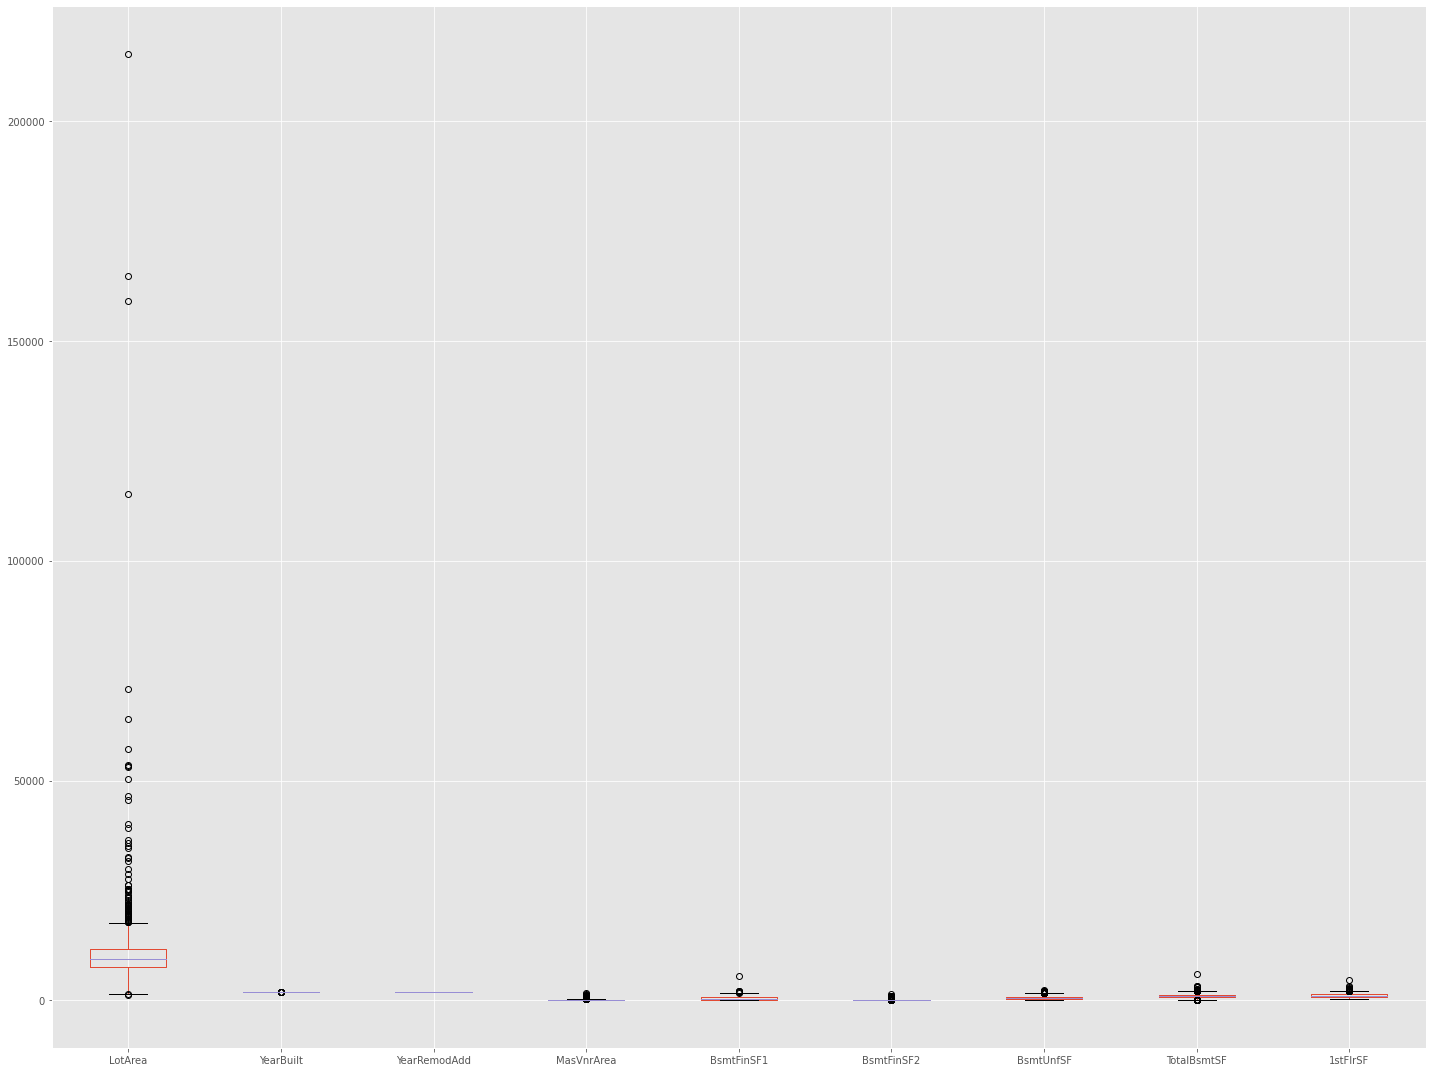

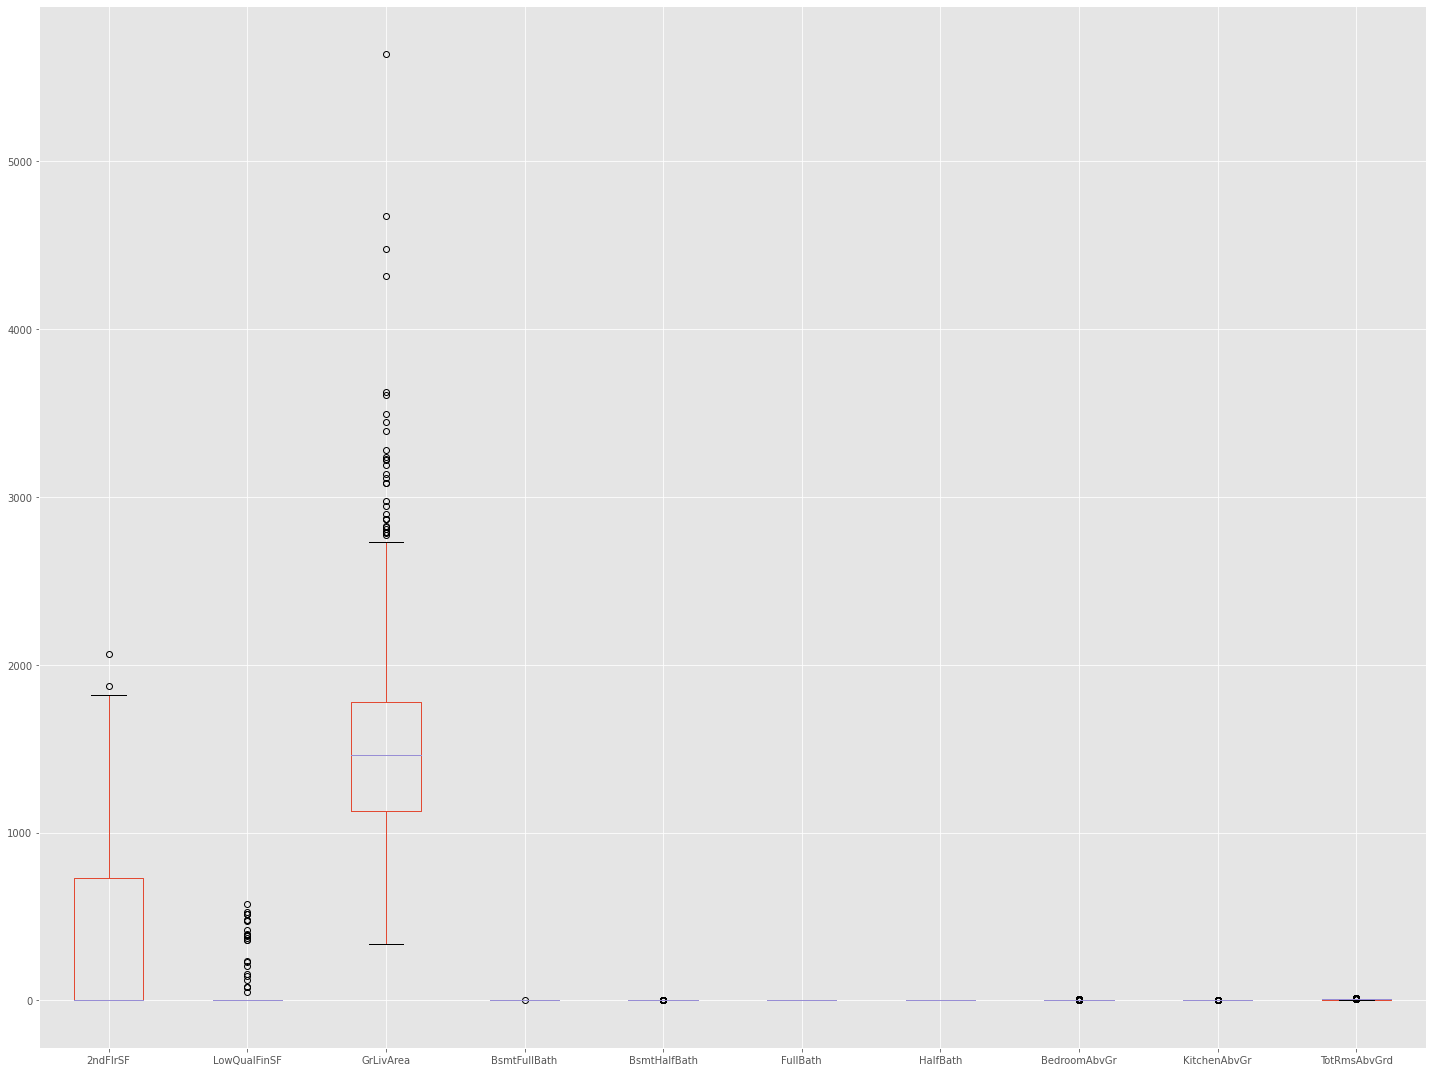

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


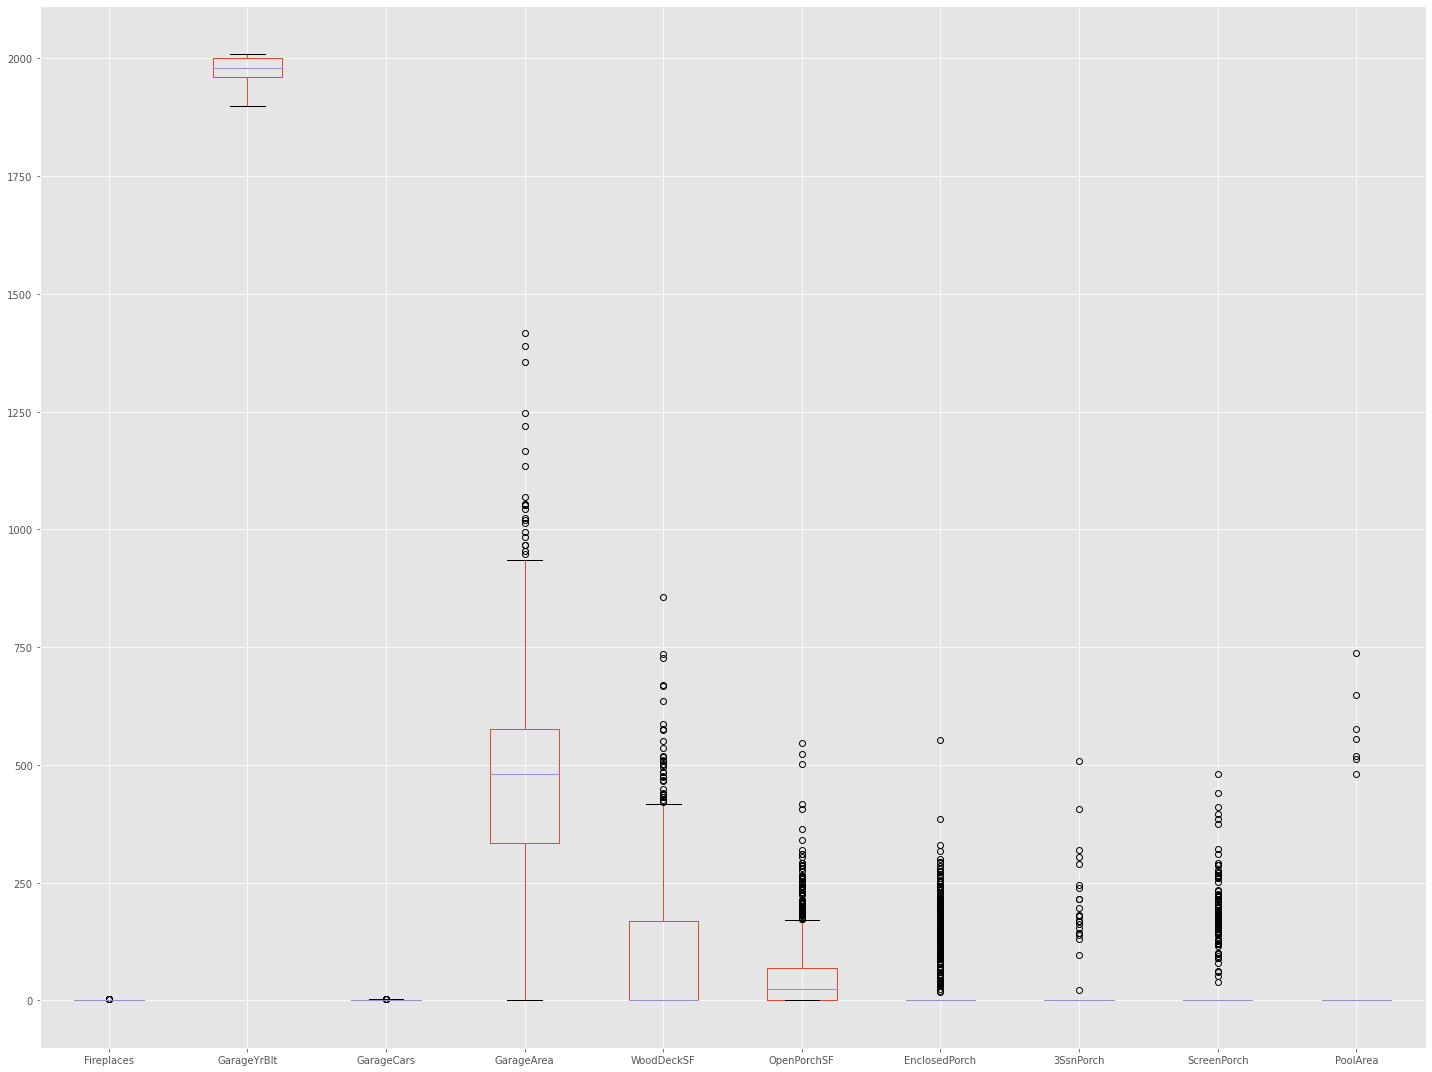

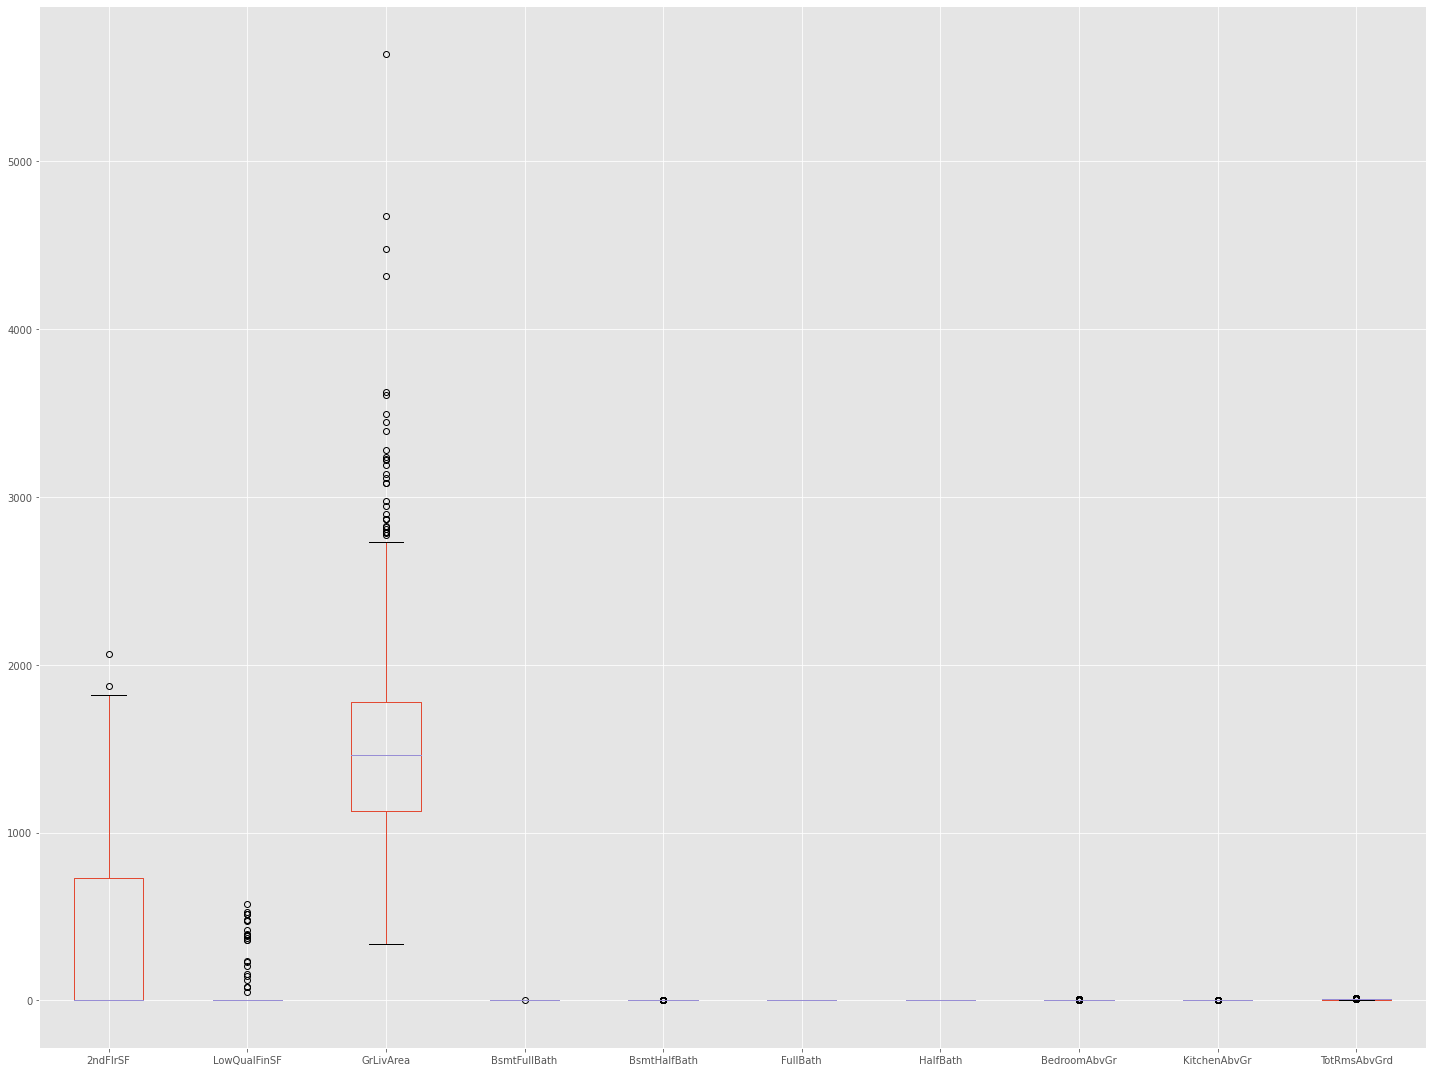

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


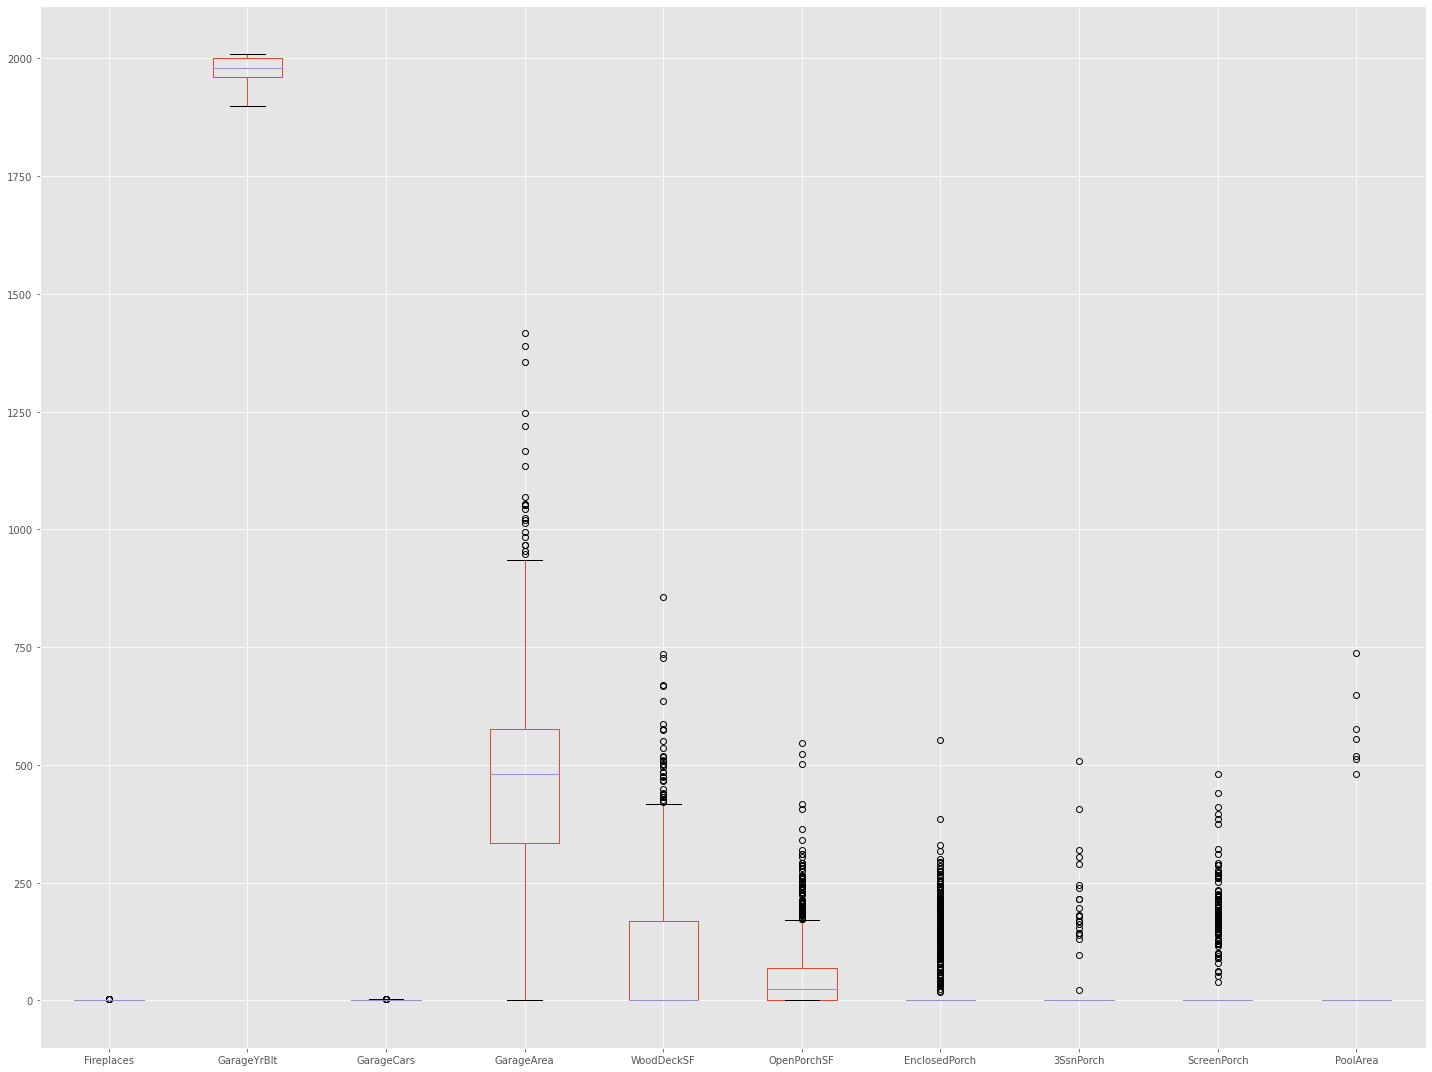

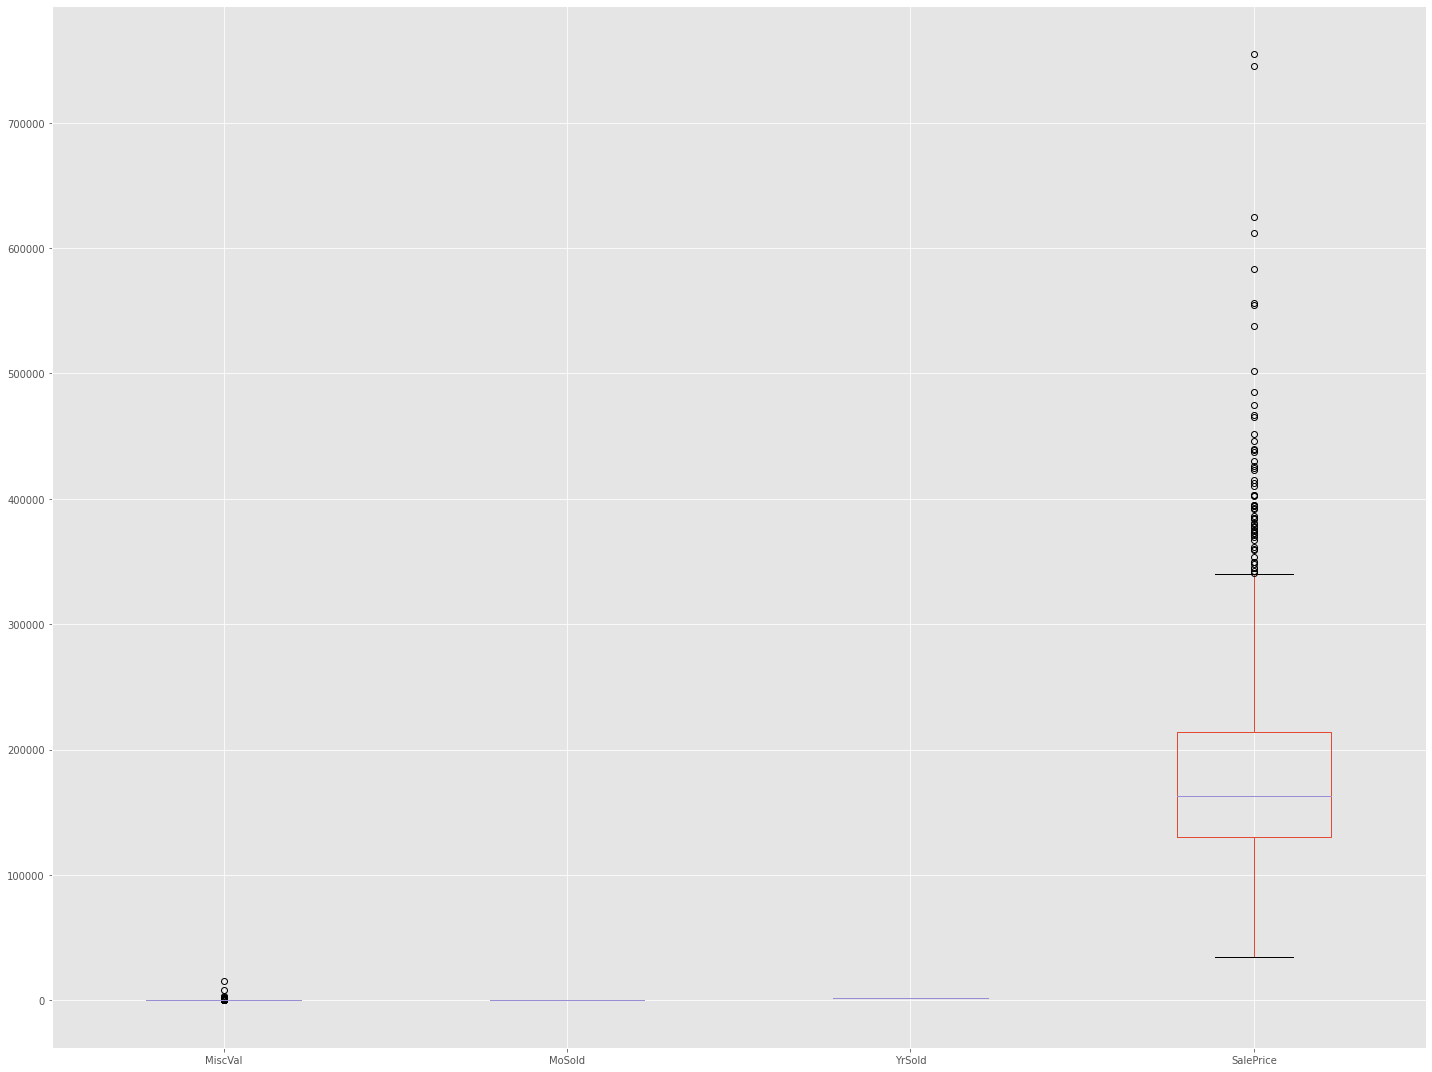

In [ ]:
# Gráfica de boxplot para visualizar posibles outliers
housing_numericas.iloc[:,1:10].boxplot(figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

housing_numericas.iloc[:,10:20].boxplot(figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

housing_numericas.iloc[:,20:30].boxplot(figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

housing_numericas.iloc[:,10:20].boxplot(figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

housing_numericas.iloc[:,20:30].boxplot(figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

housing_numericas.iloc[:,30:34].boxplot(figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

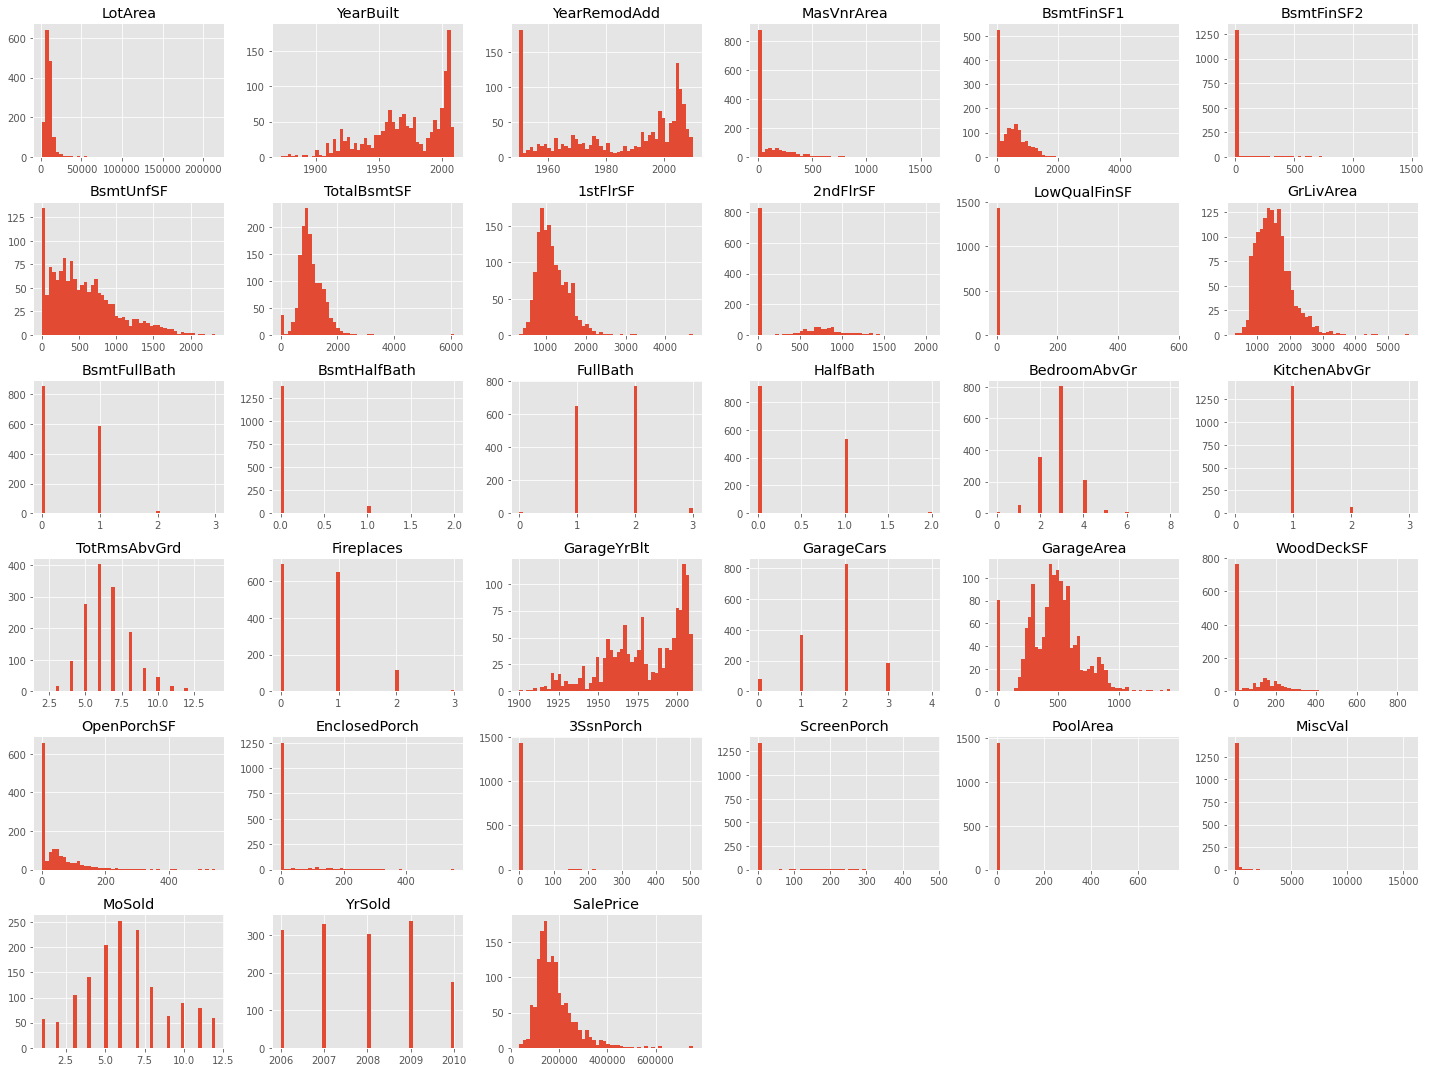

In [ ]:
# Distribución de las variables numéricas
housing_numericas.iloc[:,1:].hist(bins=50,figsize=(20,15))
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

Correlación entre las variables numéricas y variables objetivo

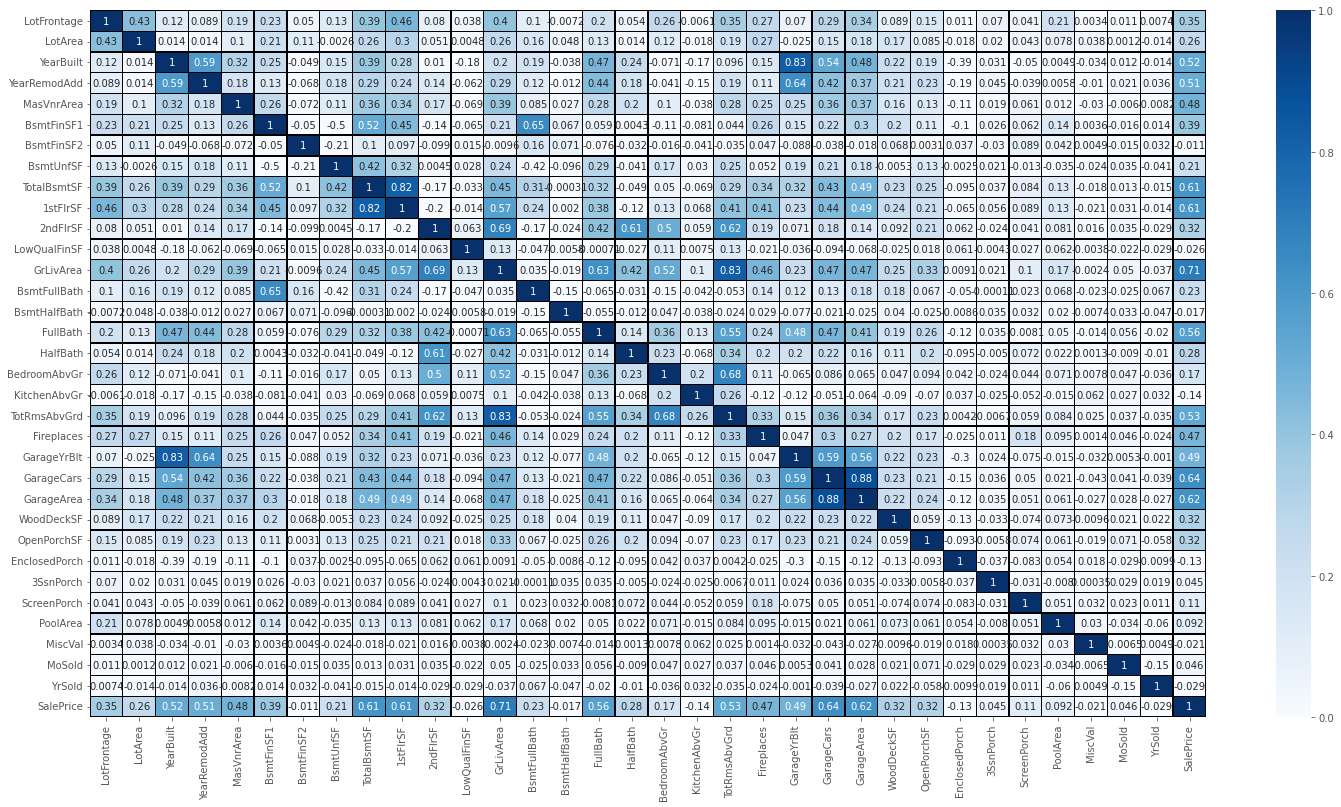

In [ ]:
fig, ax = plt.subplots(figsize=(25, 13))
sns.heatmap(housing_numericas.corr(method='pearson'), vmin=0, vmax=1, annot=True,linewidth=0.3, linecolor='k',cmap="Blues")

In [ ]:
# Se analizan las correlaciones de las variables explicativas respecto de la variable objetivo
housing_numericas.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
SalePrice        1.000000
Name: SalePrice, dtype: float64

# FAMD: Factor Analysis of Mixed Data

Los datos presentan una gran variabilidad en cada campo. Además, no encontramos con un datasets con gran cantidad de campos, resultando gran parte de ellos muy correlacionados con la variable objetivo "SalePrice". 

Se optará por aplicar técnicas de reducción de la dimensionalidad. PCA funciona para variables continuas, mientras que MCA para variables categóricas. En este caso nos encontramos con variables de cada tipo, por lo que se utilizará FAMD que es un modelo que logra trabajas con ambas variables  

In [3]:
# Se crea un pipeline que realice tranformaciones necesarias
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
        ])
housing.loc[:,housing_numericas.drop(columns='SalePrice').columns] = num_pipeline.fit_transform(housing_numericas.drop(columns='SalePrice'))

housing.dropna(inplace=True)

# Se separan variables explicativas y variable respuesta (se realiza bining en la variable obteivo para un previo análisis)
X = housing.loc[:,housing.drop(columns='SalePrice').columns]
cortes = list(housing.SalePrice.quantile([0, 0.25, 0.5, 0.75, 1]))
etiquetas = ['Low','Mid down','Mid upper', 'Upper']

cats  = pd.cut(housing.SalePrice, bins=cortes,labels=etiquetas)
y_disc = cats
y_cont = housing.SalePrice


In [4]:
# Se instancia el modelo con 2 componente principales para visualizar el funcionamiento en 2 dimensiones
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
 )

principalComponents = famd.fit_transform(X)
principalDf = pd.DataFrame({'principal component 1':principalComponents[0],'principal component 2':principalComponents[1]})
finalDf = pd.concat([principalDf, y_disc], axis = 1)
print(finalDf)

      principal component 1  principal component 2  SalePrice
Id                                                           
1                  0.864935              -0.005776  Mid upper
2                  0.031820              -0.518981  Mid upper
3                  1.015839               0.010946      Upper
4                 -0.445262               0.760145   Mid down
5                  1.904650               0.607110      Upper
...                     ...                    ...        ...
1456               0.509715               0.434769  Mid upper
1457               0.664309              -0.355698  Mid upper
1458               0.214091               1.442135      Upper
1459              -1.115537              -0.891180   Mid down
1460              -0.396845              -0.617004   Mid down

[1413 rows x 3 columns]


In [5]:
# Correlación de las variables respecto a las 2 componentes principales creadas
print(famd.column_correlations(X))

                              0         1
1stFlrSF               0.687790  0.076792
2ndFlrSF               0.316895  0.802910
3SsnPorch              0.052675 -0.027597
Alley_Grvl            -0.176793  0.121190
Alley_No alley access  0.158451 -0.119271
...                         ...       ...
Utilities_NoSeWa      -0.007051  0.001497
WoodDeckSF             0.365094  0.009984
YearBuilt              0.672515 -0.223057
YearRemodAdd           0.583588 -0.050248
YrSold                -0.028425 -0.085878

[325 rows x 2 columns]


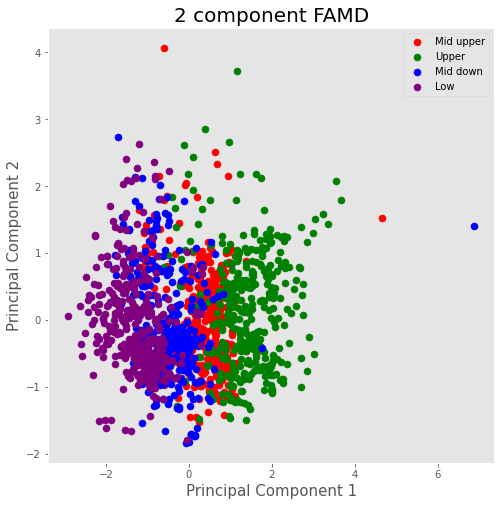

In [6]:
# Visualización de dos componentes: se observa como esas dos componentes logran captar los diferentes niveles de precio
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component FAMD', fontsize = 20)
targets = list(finalDf.SalePrice.unique())
colors = ['r', 'g', 'b','purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SalePrice'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

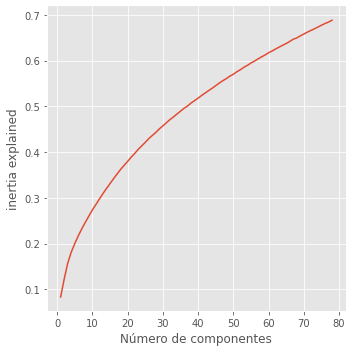

In [7]:
# Gráfica que muestra la varianza explicada para distintos números de componentes principales
X = housing.loc[:,housing.drop(columns='SalePrice').columns]
y_cont = housing.SalePrice
n_components=[]
inertia_exp=[]
for i in range(1,79):
  famd = prince.FAMD(
      n_components=i,
      n_iter=3,
      copy=True,
      check_input=True,
      engine='auto',
      random_state=42
  )
  
  famd.fit_transform(X)
  n_components.append(i)
  inertia_exp.append((famd.explained_inertia_).sum())

FAMD = pd.DataFrame({'Número de componentes':n_components,'inertia explained':inertia_exp})
sns.relplot(x='Número de componentes', y='inertia explained', kind="line",data=FAMD)

# Optimización de parámetros de un Random Forest Regression para 10 componentes principales

In [8]:
famd = prince.FAMD(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
 )

principalComponents = famd.fit_transform(X)
principalDf = pd.DataFrame(principalComponents)                          


X = principalDf.values
y = housing.loc[:,'SalePrice'].ravel()
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                        )



Curvas de validación para distintos parámetros en el set de train y test

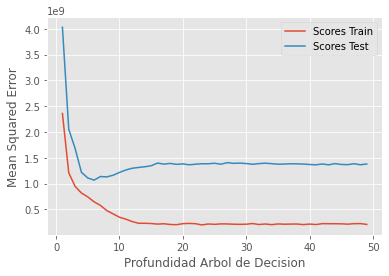

In [ ]:
# Profundidad del árbol de decisión
scores_train = []
scores_test = []
profundidades = np.arange(1,50)
for max_depth in profundidades:
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    scores_train.append(mean_squared_error(y_train, y_pred_train))
    scores_test.append(mean_squared_error(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Mean Squared Error')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

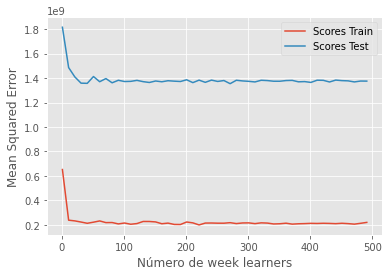

In [ ]:
# Cantidad de week learners

scores_train = []
scores_test = []
n_estimators = np.arange(1,500,10)

for max_n_estimators in n_estimators:
    model = RandomForestRegressor(n_estimators=max_n_estimators)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    scores_train.append(mean_squared_error(y_train, y_pred_train))
    scores_test.append(mean_squared_error(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

plt.plot(n_estimators,scores_train, label = 'Scores Train')
plt.plot(n_estimators,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Mean Squared Error')
plt.xlabel('Número de week learners')
plt.show()

Se eligen hiperparámetros a través de GridSearch

In [ ]:
param_grid = {'max_depth': list(np.arange(1,15)), 'n_estimators':[10,20,100,500]}

# Búsqueda con grid search de los mejores parámetros para Random Forest Regression con validación cruzada

grid = GridSearchCV(
        estimator  = RandomForestRegressor(),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        
        cv         = 5, 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X, y_cont)

# Mejores parámetros para Random Forest Regression
print(grid.best_params_)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_estimators': [10, 20, 100, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# Ranking de mejores parámetros
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,0.139108,0.003656,0.009409,0.000331,4,100,"{'max_depth': 4, 'n_estimators': 100}",-32372.373705,-41239.542564,-32389.921831,...,-33248.216006,4871.257965,1,-28592.137278,-29042.549022,-29110.211629,-29889.471389,-29040.542809,-29134.982426,420.002576
15,0.844945,0.196271,0.054148,0.013179,4,500,"{'max_depth': 4, 'n_estimators': 500}",-32493.142262,-41244.378025,-32409.180759,...,-33256.076107,4803.971476,2,-28719.791570,-28948.676171,-28786.377788,-30013.066719,-28980.633660,-29089.709182,471.852921
12,0.016374,0.002199,0.001906,0.000095,4,10,"{'max_depth': 4, 'n_estimators': 10}",-32635.663334,-42727.537561,-32516.177712,...,-33408.342666,5187.344306,3,-29774.513331,-30460.241198,-28833.908840,-30887.006406,-28969.717322,-29785.077419,804.952045
21,0.032459,0.001469,0.002866,0.000017,6,20,"{'max_depth': 6, 'n_estimators': 20}",-33102.193984,-44168.611278,-31965.659920,...,-33674.908378,5700.902302,4,-26385.602608,-26272.842034,-25919.185234,-28244.024599,-25767.707544,-26517.872404,891.998904
19,0.743288,0.040211,0.043802,0.000361,5,500,"{'max_depth': 5, 'n_estimators': 500}",-32939.979694,-44280.999888,-31836.500753,...,-33736.605857,5810.925311,5,-27123.117796,-27473.096686,-27191.352466,-28272.864256,-27201.198211,-27452.325883,427.379186


# Implementación del modelo

In [17]:
# Se instancia famd para reducir dimensión a 10 componentes principales
famd = prince.FAMD(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
 )

# Se separa variable objetivo y explicativas
X = housing.loc[:,housing.drop(columns='SalePrice').columns]
y = housing.SalePrice.ravel()

# Se transforman variables explicativas para obtener las 10 componentes
componentes = famd.fit_transform(X)

# Se separa en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
                                        componentes.values,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                        )


In [18]:
# Se instancia modelo de Random Forest
model = RandomForestRegressor(max_depth=12,n_estimators=100)

# Se entrena modelo 
model.fit(X_train,y_train)

#Predicciones con el modelo
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_pred = model.predict(componentes.values)



In [21]:
# Métricas de la performance del modelo

## Coeficiente de determinacion
coef_determ_train = model.score(X_train,y_train)
coef_determ_test = model.score(X_test,y_test)


# Error cuadrático medio
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
error_total = mean_squared_error(y, y_pred)

# Error cuadrático logarítmico medio
def RMSLE(y_true: list, y_pred: list) -> float:
    n = len(y_true)
    msle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))
    return msle

error_log_train = RMSLE(y_train,y_train_pred)
error_log_test = RMSLE(y_test,y_test_pred)
error_log_total = RMSLE(y,y_pred)

print(f'''Coeficiente de determinación de datos de entrenamiento {coef_determ_train}
Coeficiente de determinación de datos de prueba {coef_determ_train}
Error en los datos de entrenamiento: {np.sqrt(error_train)} 
Error en los datos de prueba: {np.sqrt(error_test)}
Error en los datos completos: {np.sqrt(error_total)}
Error cuadrático logarítmico medio: {error_log_train}
Error cuadrático logarítmico medio: {error_log_test}
Error cuadrático logarítmico medio: {error_log_total}''')

Coeficiente de determinación de datos de entrenamiento 0.9758635867364609
Coeficiente de determinación de datos de prueba 0.9758635867364609
Error en los datos de entrenamiento: 11288.971206847706 
Error en los datos de prueba: 38091.61928816769
Error en los datos completos: 22904.01090984991
Error cuadrático logarítmico medio: 0.0635004594947752
Error cuadrático logarítmico medio: 0.14880438794104503
Error cuadrático logarítmico medio: 0.0972970776105571


# Resultados de datos de test


In [32]:
# Se importan datos
test_housing = pd.read_csv('houses_test_raw.csv')

# Se reemplazan valores nulos por su definición en el diccionario
test_housing.Alley.fillna('No alley access',inplace=True)
test_housing.FireplaceQu.fillna('No Fireplace',inplace=True)
test_housing.PoolQC.fillna('No pool',inplace=True)
test_housing.Fence.fillna('No fence',inplace=True)
test_housing.BsmtQual.fillna('No Basement',inplace=True)
test_housing.BsmtCond.fillna('No Basement',inplace=True)
test_housing.BsmtFinType1.fillna('No Basement',inplace=True)
test_housing.BsmtFinType2.fillna('No Basement',inplace=True)
test_housing.GarageType.fillna('No Garage',inplace=True)
test_housing.GarageFinish.fillna('No Garage',inplace=True)
test_housing.GarageQual.fillna('No Garage',inplace=True)
test_housing.GarageCond .fillna('No Garage',inplace=True)
test_housing.MiscFeature .fillna('None',inplace=True)

# Se separan variables categóricas y numéricas
test_housing.loc[:,['OverallQual','OverallCond','MSSubClass']]=test_housing.loc[:,['OverallQual','OverallCond','MSSubClass']].astype('object')
test_housing_categoricas = test_housing.select_dtypes(include=['object','category'])
test_housing_numericas = test_housing.select_dtypes(include='number')
test_housing.loc[:,test_housing_categoricas.columns.values] = test_housing.loc[:,test_housing_categoricas.columns.values].astype('object')




In [33]:
# Se aplica pipline de transformación de variables numéricas
test_housing.loc[:,housing_numericas.columns] = num_pipeline.fit_transform(test_housing_numericas)
test_housing.dropna(inplace=True)

componentes = famd.fit_transform(test_housing)

#Predicciones con el modelo
y_pred = model.predict(componentes.values)




In [37]:
# Exportación de resultados
predicciones = pd.DataFrame({'Predicción':y_pred})
#predicciones.to_csv('Predicciones')

In [38]:
predicciones

,Predicción
0,125779.966494
1,163850.989573
2,198305.391944
3,195451.333418
4,176238.515813
...,...
1388,98477.346667
1389,99461.181217
1390,185565.690727
1391,110551.078239
